<a href="https://colab.research.google.com/github/Yusupzk28/DataMining/blob/main/EDA/2318038EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. Import Library

Mengimpor semua library yang dibutuhkan untuk membaca data, mengolah, dan membuat visualisasi.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# B. Load Dataset

Menghubungkan Google Drive ke Colab dan membaca file dataset Netflix dari folder Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/Colab Notebooks/EDA/2318038Dataset.csv"
data = pd.read_csv(path, sep=None, engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# C. Cleaning Data Ringan

Menyiapkan data agar rapi: mengubah tipe data, memisahkan kolom durasi, dan menghapus duplikasi.

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['duration_value'] = data['duration'].str.extract('(\d+)').astype(float)
data['duration_unit'] = data['duration'].str.extract('([A-Za-z]+)')
data = data.drop_duplicates()
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-415266530.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['duration_value'] = data['duration'].str.extract('(\d+)').astype(float)


# D. Melihat Struktur Data

Menampilkan beberapa baris awal dan informasi umum tentang kolom dalam dataset.

In [ ]:
print("===== 5 Data Pertama =====")
print(data.head(), "\n")
print("===== Informasi Dataset =====")
print(data.info(), "\n")

===== 5 Data Pertama =====
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25        2020.0  PG-13     90 min   
1 2021-09-24        2021.0  TV-MA  2 Seasons   
2 2021-09-24        2021.0  T

# E. Statistik Deskriptif

Melihat ringkasan data numerik dan kategorikal seperti jumlah nilai unik, rata-rata, dan distribusi.

In [ ]:
print("===== Statistik Deskriptif =====")
print(data.describe(include='all').T)
print("\n")

===== Statistik Deskriptif =====
                 count unique  \
show_id           8809   8809   
type              8808      3   
title             8807   8804   
director          6173   4528   
cast              7983   7693   
country           7976    749   
date_added        8708    NaN   
release_year    8806.0    NaN   
rating            8803     18   
duration          8804    221   
listed_in         8806    514   
description       8806   8774   
duration_value  8804.0    NaN   
duration_unit     8804      4   

                                                              top  freq  \
show_id                                                     s8807     1   
type                                                        Movie  6131   
title                                                      Feb-09     2   
director                                            Rajiv Chilaka    19   
cast                                           David Attenborough    19   
country              

# F. Distribusi Jenis Tayangan

Mengetahui perbandingan jumlah Movie dan TV Show di dataset.

/tmp/ipython-input-69529475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type', palette='Set2')


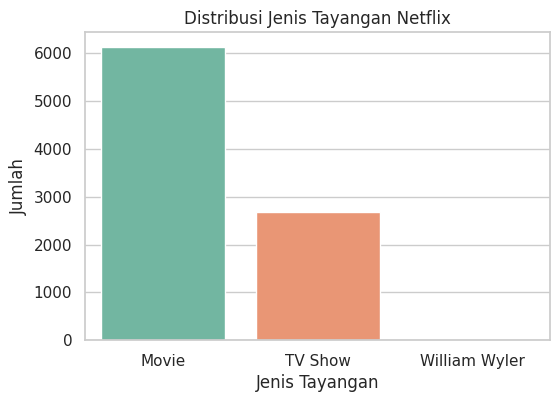

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='type', palette='Set2')
plt.title('Distribusi Jenis Tayangan Netflix')
plt.xlabel('Jenis Tayangan')
plt.ylabel('Jumlah')
plt.show()
plt.savefig('distribusi_jenis.png')

# G. Jumlah Tayangan per Tahun Rilis

Melihat tren jumlah tayangan berdasarkan tahun rilis untuk memahami pertumbuhan konten Netflix.

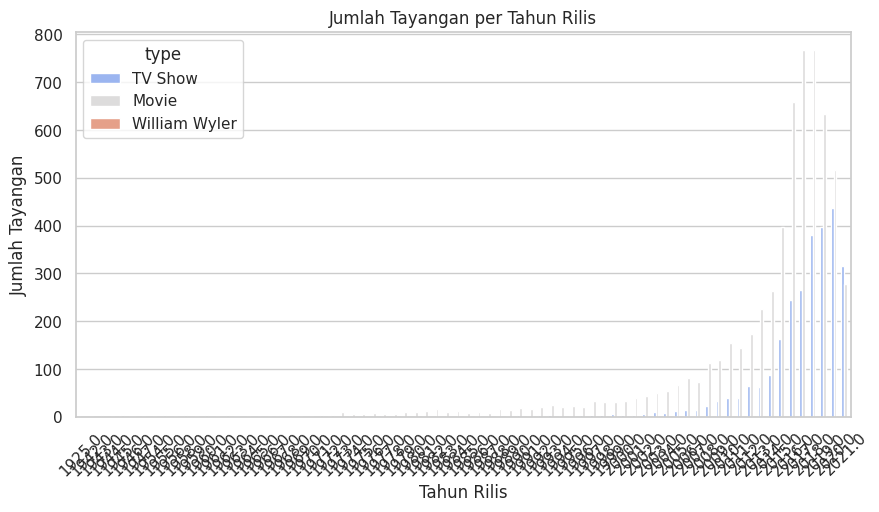

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='release_year', hue='type', palette='coolwarm')
plt.title('Jumlah Tayangan per Tahun Rilis')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Tayangan')
plt.xticks(rotation=45)
plt.show()

plt.savefig('tahun_rilis.png')

# H. Negara dengan Tayangan Terbanyak

Menampilkan negara-negara yang paling banyak memproduksi tayangan di Netflix.

/tmp/ipython-input-2583130394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


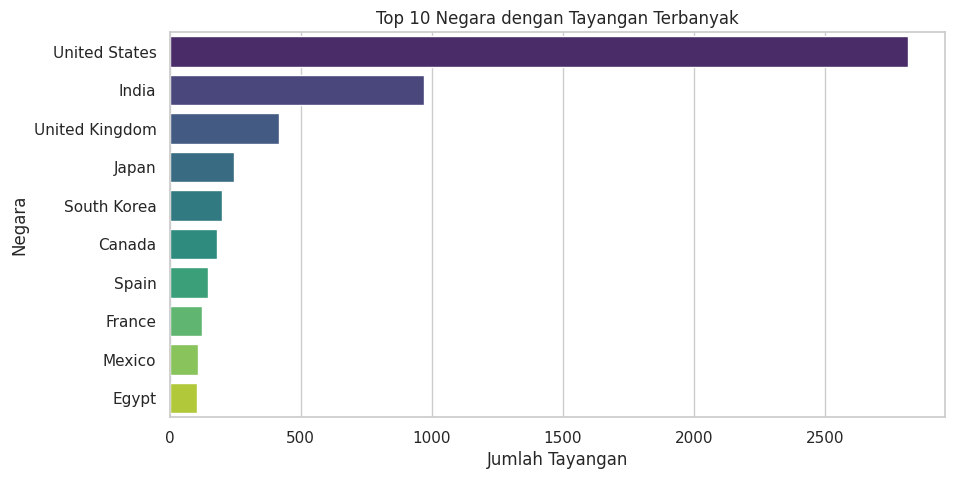

<Figure size 640x480 with 0 Axes>

In [ ]:
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Negara dengan Tayangan Terbanyak')
plt.xlabel('Jumlah Tayangan')
plt.ylabel('Negara')
plt.show()

plt.savefig('negara_terbanyak.png')

# I. Genre Paling Populer

Melihat genre yang paling sering muncul untuk mengetahui preferensi konten.

/tmp/ipython-input-206579999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Jumlah', y='Genre', palette='magma')


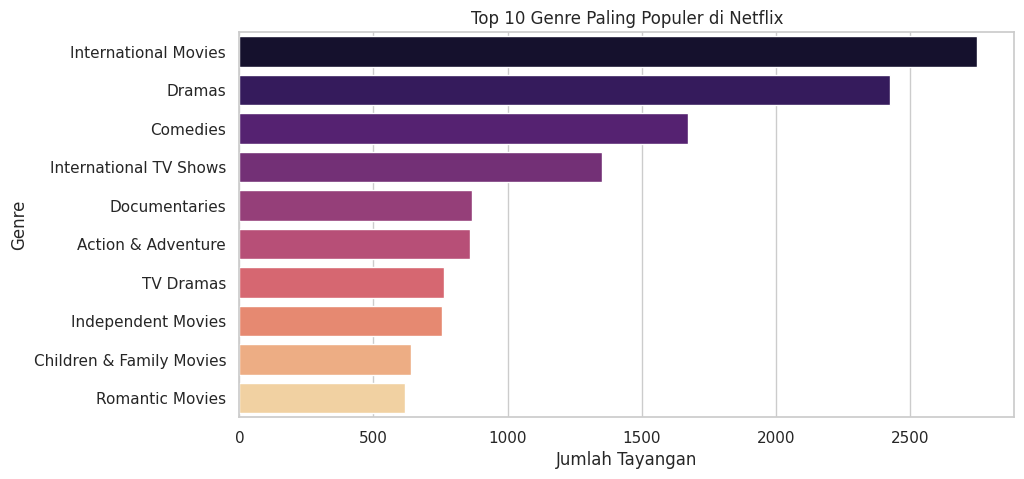

<Figure size 640x480 with 0 Axes>

In [ ]:
genres = data['listed_in'].dropna().str.split(', ')
genre_counts = Counter([g for sublist in genres for g in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Jumlah'])
plt.figure(figsize=(10,5))
sns.barplot(data=top_genres, x='Jumlah', y='Genre', palette='magma')
plt.title('Top 10 Genre Paling Populer di Netflix')
plt.xlabel('Jumlah Tayangan')
plt.ylabel('Genre')
plt.show()

plt.savefig('genre_populer.png')

# J. Distribusi Rating

Menunjukkan kategori rating (misalnya TV-MA, PG-13, dll) untuk melihat target usia konten Netflix.

/tmp/ipython-input-3093711929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index, palette='pastel')


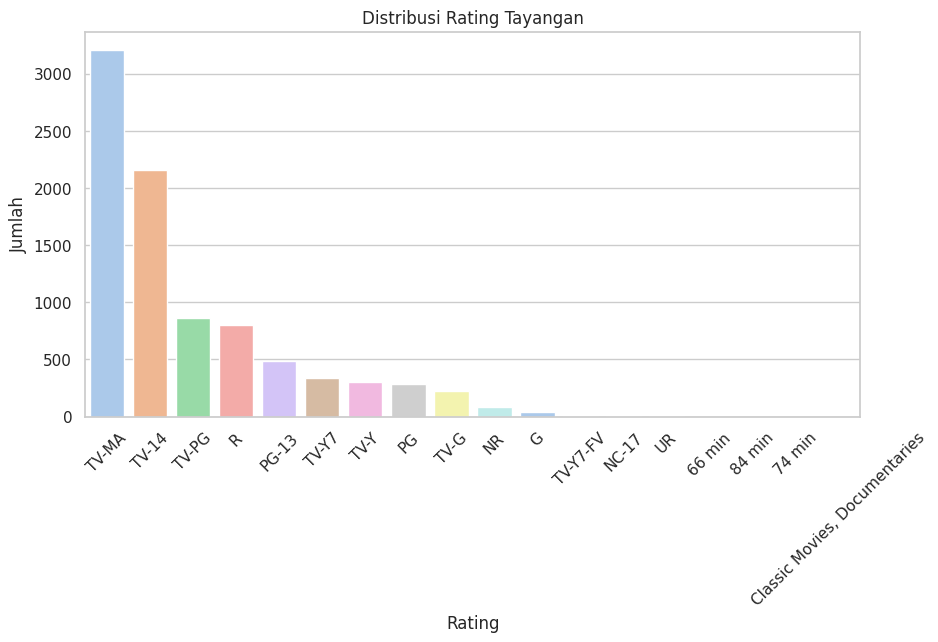

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index, palette='pastel')
plt.title('Distribusi Rating Tayangan')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

# K. Distribusi Durasi Film

Melihat sebaran panjang durasi film dalam menit untuk memahami tipe konten yang umum.

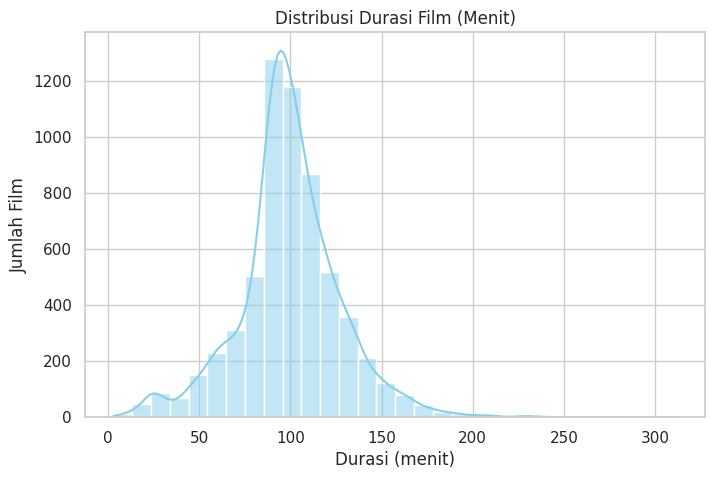

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data[data['duration_unit'] == 'min'], x='duration_value', bins=30, kde=True, color='skyblue')
plt.title('Distribusi Durasi Film (Menit)')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah Film')
plt.show()

# L. Top 10 Sutradara Terbanyak

Menampilkan sutradara yang paling banyak menghasilkan tayangan di Netflix.

/tmp/ipython-input-2151152809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')


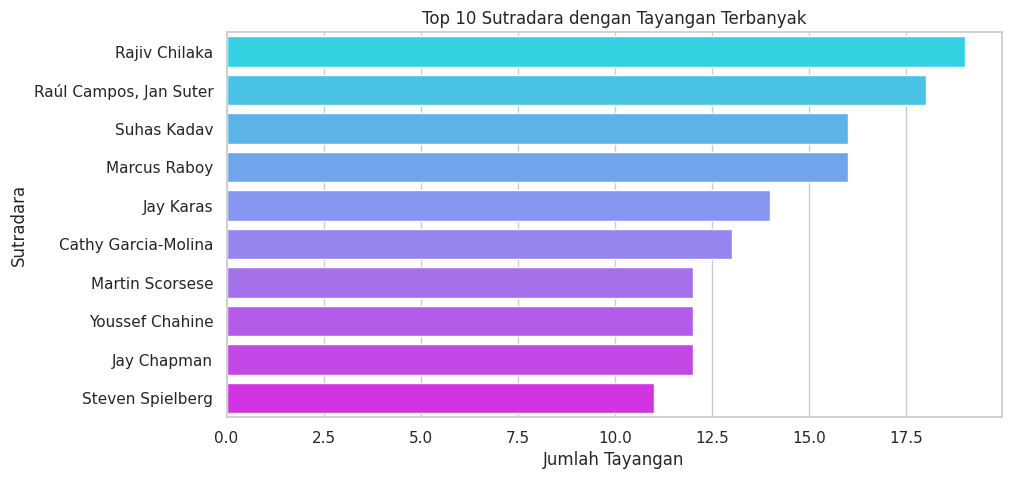

In [ ]:
top_directors = data['director'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cool')
plt.title('Top 10 Sutradara dengan Tayangan Terbanyak')
plt.xlabel('Jumlah Tayangan')
plt.ylabel('Sutradara')
plt.show()

# M. Korelasi Antar Fitur

Melihat hubungan antara durasi tayangan dan tahun rilis menggunakan heatmap.

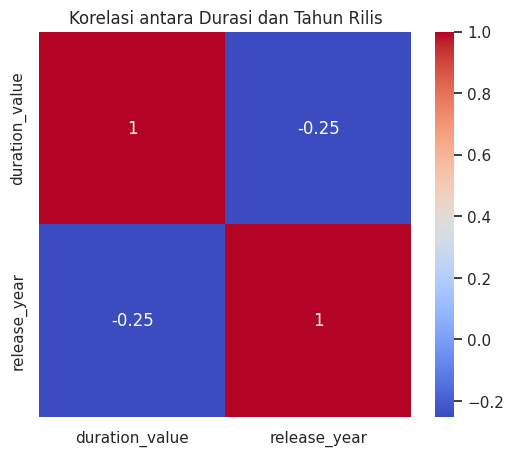

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(data[['duration_value','release_year']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antara Durasi dan Tahun Rilis')
plt.show()

plt.savefig('korelasi.png')

# N. Kesimpulan

Menyajikan hasil ringkas dari seluruh analisis yang sudah dilakukan.

In [ ]:
print("\n=== Kesimpulan EDA Dataset Netflix ===")
print(f"- Total data: {len(data)} tayangan")
print(f"- Jumlah Movie: {len(data[data['type']=='Movie'])}")
print(f"- Jumlah TV Show: {len(data[data['type']=='TV Show'])}")
print(f"- Tahun rilis paling awal: {int(data['release_year'].min())}")
print(f"- Tahun rilis paling baru: {int(data['release_year'].max())}")
print(f"- Negara dengan tayangan terbanyak: {data['country'].mode()[0]}")
print(f"- Genre paling populer: {top_genres['Genre'].iloc[0]}")
print("=======================================")


=== Kesimpulan EDA Dataset Netflix ===
- Total data: 8809 tayangan
- Jumlah Movie: 6131
- Jumlah TV Show: 2676
- Tahun rilis paling awal: 1925
- Tahun rilis paling baru: 2021
- Negara dengan tayangan terbanyak: United States
- Genre paling populer: International Movies
